In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# import dataset
df = pd.read_csv("/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-cleaned-transformed.csv", skipinitialspace=True)

# Regression

In [ ]:
X = df.values
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,0,1,3,0,0,1,2.0,0,1,2,...,0.0,1,-1.215025,0.403514,3.840000e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,0,1,0,0,0,0,16.0,0,1,2,...,0.0,1,-1.384174,0.290905,-7.150000e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,0,0,4,1,0,1,16.0,0,1,2,...,0.0,1,-1.242947,0.470350,2.430000e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,0,1,7,0,1,0,14.0,0,1,2,...,0.0,1,-1.445318,0.274756,2.370000e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,0,4,1,0,1,2.0,0,1,2,...,0.0,1,-1.366742,0.318926,8.450000e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


## Univariate Regression (2 variables)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=100)

In [ ]:
x_train = df_train["length_ms"].values.reshape(-1, 1)
y_train = df_train["intensity"].values

x_test = df_test["length_ms"].values.reshape(-1, 1)
y_test = df_test["intensity"].values

### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00286876]
Intercept: 
 -49.3847797751755


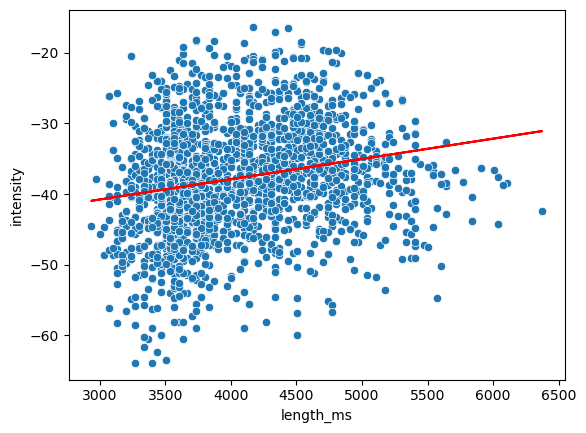

In [ ]:
sns.scatterplot(data=df_train, x="length_ms", y="intensity")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 59.408
MAE: 6.210


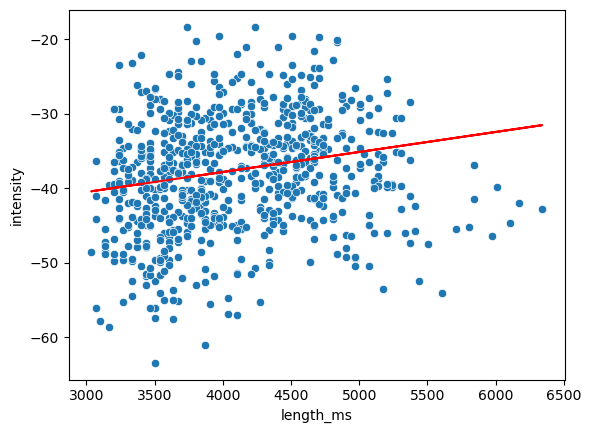

In [ ]:
sns.scatterplot(data=df_test, x="length_ms", y="intensity")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

#### Ridge

In [ ]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00286876]
Intercept: 
 -49.384779756649436


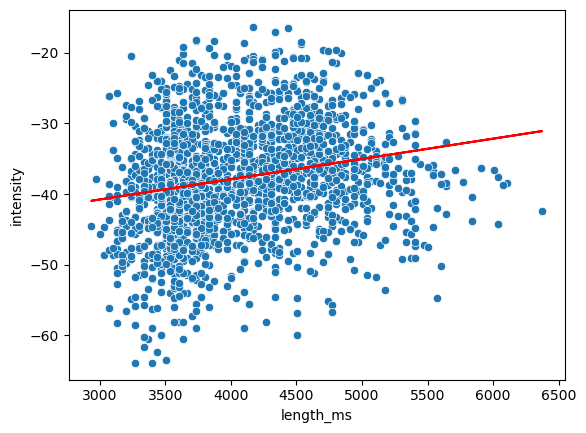

In [ ]:
sns.scatterplot(data=df_train, x="length_ms", y="intensity")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 59.408
MAE: 6.210


#### Lasso

In [ ]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00286589]
Intercept: 
 -49.373078112242844


In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 59.405
MAE: 6.210


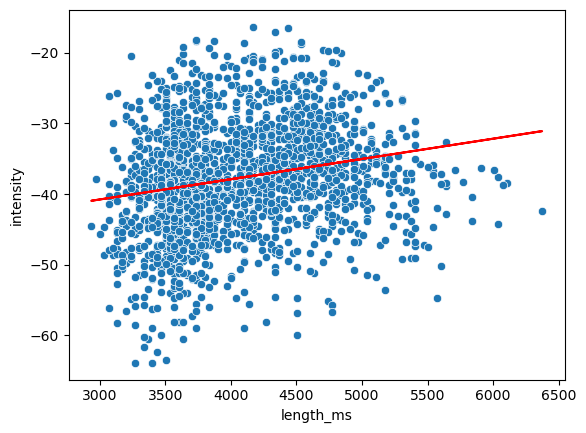

In [ ]:
sns.scatterplot(data=df_train, x="length_ms", y="intensity")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

### Nonlinear regression

#### Decision Tree Regressor

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.032
MSE: 57.690
MAE: 6.164


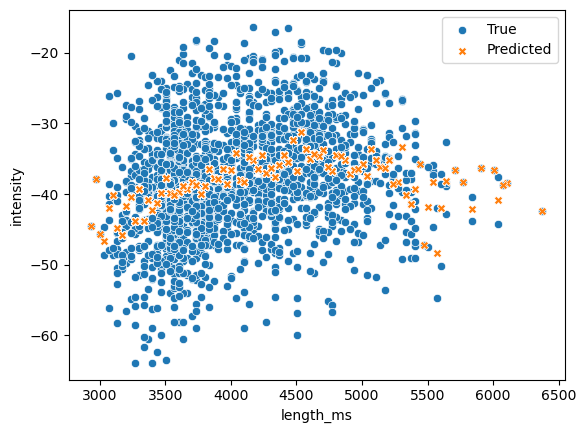

In [ ]:
sns.scatterplot(data=df_train, x="length_ms", y="intensity", label="True")
sns.scatterplot(data=df_train, x="length_ms", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [ ]:
reg = KNeighborsRegressor()

In [ ]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.070
MSE: 63.757
MAE: 6.428


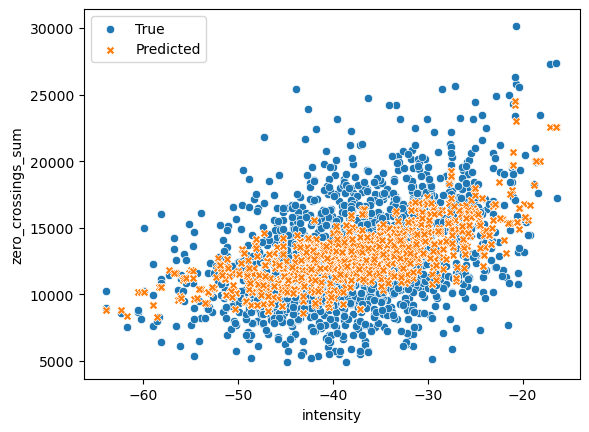

In [ ]:
sns.scatterplot(data=df_train, x="intensity", y="zero_crossings_sum", label="True")
sns.scatterplot(data=df_train, x="intensity", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

## Multivariate Regression (3+ variables)

In [ ]:
X_train = df_train[["intensity", "length_ms"]].values
y_train = df_train["zero_crossings_sum"].values

X_test = df_test[["intensity", "length_ms"]].values
y_test = df_test["zero_crossings_sum"].values

### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.191
MSE: 10783003.407
MAE: 2521.555


In [ ]:
sns.scatterplot(data=df_test, x="hue", y="zero_crossings_sum", label="True")
sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### Nonlinear Regression

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.584
MSE: 21106927.183
MAE: 3621.253


In [ ]:
sns.scatterplot(data=df_test, x="hue", y="zero_crossings_sum", label="True")
sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

In [ ]:
reg = KNeighborsRegressor()

In [ ]:
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.038
MSE: 12813007.357
MAE: 2799.270
